<a href="https://colab.research.google.com/github/ludoveltz/test_github_fev25/blob/main/Exc_ninja3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chargement de MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Entraînement avec activation relu
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8874 - loss: 0.3814 - val_accuracy: 0.9768 - val_loss: 0.0745
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9821 - loss: 0.0578 - val_accuracy: 0.9806 - val_loss: 0.0686
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.9876 - loss: 0.0398 - val_accuracy: 0.9884 - val_loss: 0.0430
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9897 - val_loss: 0.0352
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9930 - loss: 0.0200 - val_accuracy: 0.9898 - val_loss: 0.0358
Précision sur le test (relu): 0.9891


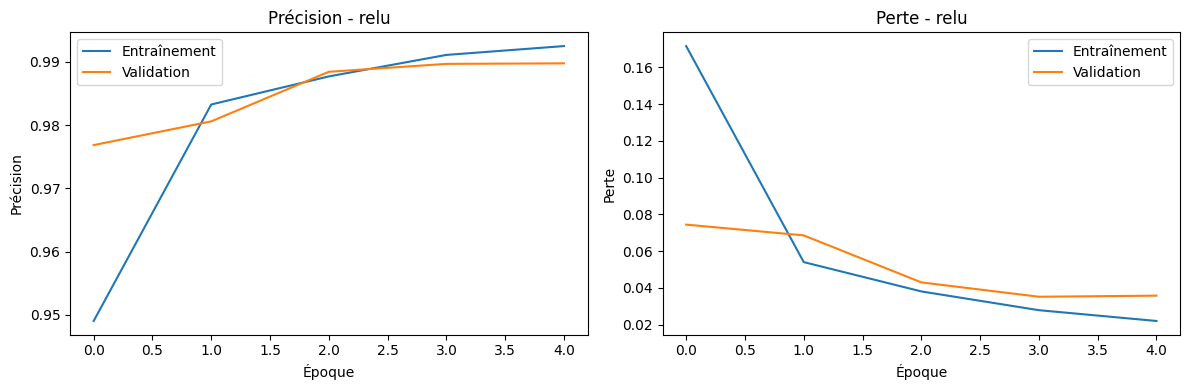


Entraînement avec activation leaky_relu
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8874 - loss: 0.3709 - val_accuracy: 0.9771 - val_loss: 0.0754
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9829 - loss: 0.0549 - val_accuracy: 0.9863 - val_loss: 0.0463
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9888 - loss: 0.0371 - val_accuracy: 0.9853 - val_loss: 0.0487
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9907 - loss: 0.0281 - val_accuracy: 0.9866 - val_loss: 0.0452
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9925 - loss: 0.0227 - val_accuracy: 0.9878 - val_loss: 0.0455
Précision sur le test (leaky_relu): 0.9901


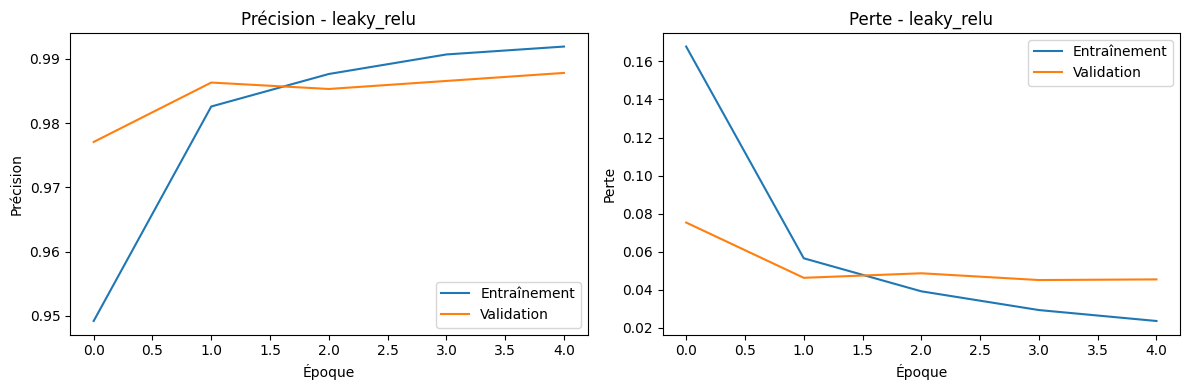


Entraînement avec activation swish
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8691 - loss: 0.4262 - val_accuracy: 0.9802 - val_loss: 0.0678
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9842 - loss: 0.0535 - val_accuracy: 0.9852 - val_loss: 0.0512
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9900 - loss: 0.0327 - val_accuracy: 0.9844 - val_loss: 0.0487
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9880 - val_loss: 0.0454
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9861 - val_loss: 0.0462
Précision sur le test (swish): 0.9867


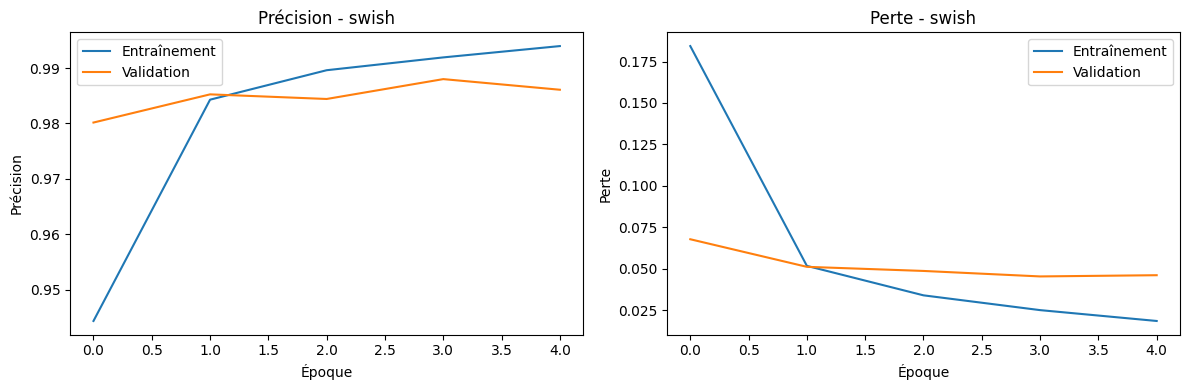


Résultats finaux:
relu: 0.9891
leaky_relu: 0.9901
swish: 0.9867


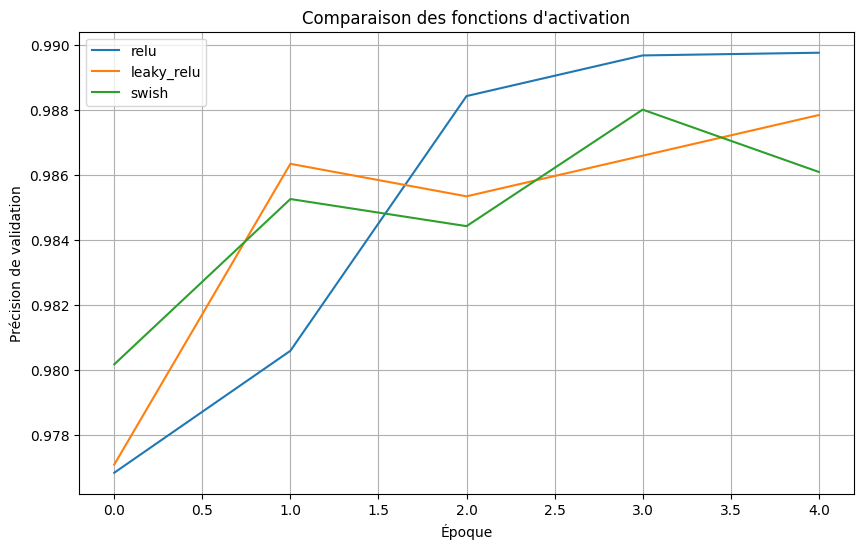

In [1]:
# Installation des dépendances
!pip install tensorflow numpy matplotlib scikit-learn

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Configuration pour afficher les graphiques dans Colab
%matplotlib inline

# Chargement des données MNIST via Keras (plus fiable que OpenML dans Colab)
print("Chargement de MNIST...")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Préparation des données
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encoding des labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

def create_cnn_model(activation='relu'):
    """Création du modèle CNN avec activation configurable"""
    model = models.Sequential([
        # Première couche de convolution
        layers.Conv2D(16, (3, 3), activation=activation, input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        # Deuxième couche de convolution
        layers.Conv2D(32, (3, 3), activation=activation),
        layers.MaxPooling2D((2, 2)),

        # Aplatissement et couches denses
        layers.Flatten(),
        layers.Dense(128, activation=activation),
        layers.Dense(10, activation='softmax')
    ])

    return model

def train_and_evaluate(activation):
    """Entraînement et évaluation du modèle"""
    model = create_cnn_model(activation)

    # Compilation
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entraînement
    print(f"\nEntraînement avec activation {activation}")
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Évaluation
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Précision sur le test ({activation}): {test_acc:.4f}")

    return history, test_acc

def plot_training_history(history, activation):
    """Visualisation de l'apprentissage"""
    plt.figure(figsize=(12, 4))

    # Précision
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Précision - {activation}')
    plt.xlabel('Époque')
    plt.ylabel('Précision')
    plt.legend()

    # Perte
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entraînement')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'Perte - {activation}')
    plt.xlabel('Époque')
    plt.ylabel('Perte')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Test des différentes activations
activations = ['relu', 'leaky_relu', 'swish']
results = {}

for activation in activations:
    history, test_acc = train_and_evaluate(activation)
    results[activation] = {
        'history': history,
        'test_accuracy': test_acc
    }
    plot_training_history(history, activation)

# Affichage des résultats finaux
print("\nRésultats finaux:")
for activation, result in results.items():
    print(f"{activation}: {result['test_accuracy']:.4f}")

# Visualisation comparative des performances
plt.figure(figsize=(10, 6))
for activation in activations:
    plt.plot(
        results[activation]['history'].history['val_accuracy'],
        label=activation
    )
plt.title("Comparaison des fonctions d'activation")
plt.xlabel('Époque')
plt.ylabel('Précision de validation')
plt.legend()
plt.grid(True)
plt.show()
